# My Yoga attendance 

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
import chardet

In [8]:
with open('BYL_1.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

In [54]:
df_BYL1 = pd.read_csv('BYL_1.csv', encoding='ISO-8859-1')

In [55]:
df_BYL2 = pd.read_csv('BYL_2.csv', encoding='ISO-8859-1')

In [56]:
df_BYL1.head()

,Date,Day,Time,Teacher,Location,Payment Method,Class Type,Status,Web,Payment Ref #
0,19/12/2018,Wednesday,5:30ÊPM,Ilkka,BYL London Bridge,Annual Unlimited £999 (Paid in Advance),BYL Express (60),Signed in,No,446800
1,17/12/2018,Monday,5:15ÊPM,Elizabeth,BYL Canary Wharf,Annual Unlimited £999 (Paid in Advance),Hot Jivamukti,Signed in,No,446800
2,13/12/2018,Thursday,4:30ÊPM,Eva,BYL Canary Wharf,Annual Unlimited £999 (Paid in Advance),Hot Vinyasa Flow (60),Signed in,No,446800
3,12/12/2018,Wednesday,4:15ÊPM,Andy,BYL London Bridge,Annual Unlimited £999 (Paid in Advance),BYL Hot Power Flow,Signed in,No,446800
4,11/12/2018,Tuesday,4:30ÊPM,Beth,BYL Canary Wharf,Annual Unlimited £999 (Paid in Advance),BYL Express (60),Signed in,No,446800


In [57]:
df_BYL1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 10 columns):
Date              165 non-null object
Day               165 non-null object
Time              165 non-null object
Teacher           165 non-null object
Location          165 non-null object
Payment Method    165 non-null object
Class Type        165 non-null object
Status            165 non-null object
Web               165 non-null object
Payment Ref #     165 non-null int64
dtypes: int64(1), object(9)
memory usage: 13.0+ KB


In [58]:
# Clening time string
df_BYL1['Time'] = df_BYL1['Time'].str.replace('Ê', ' ')
df_BYL2['Time'] = df_BYL2['Time'].str.replace('Ê', ' ')

In [62]:
# Merging to a single timestamp
# https://docs.python.org/3/library/time.html#time.strftime
df_BYL1['Timestamp'] = df_BYL1['Date'] + ' ' + df_BYL1['Time']
df_BYL2['Timestamp'] = df_BYL2['Date'] +  ' '+ df_BYL2['Time']

In [65]:
df_BYL1['Timestamp'] = pd.to_datetime(df_BYL1['Timestamp'])
df_BYL2['Timestamp'] = pd.to_datetime(df_BYL2['Timestamp'])

In [67]:
del df_BYL1['Date']
del df_BYL1['Time']
del df_BYL2['Date']
del df_BYL2['Time']

In [69]:
df_BYL1.columns

Index(['Day', 'Teacher', 'Location', 'Payment Method', 'Class Type', 'Status',
       'Web', 'Payment Ref #', 'Timestamp'],
      dtype='object')

In [70]:
df_BYL2.columns

Index(['Day', 'Teacher', 'Location', 'Class Type', 'Status', 'Web',
       'Payment Ref #', 'Timestamp'],
      dtype='object')

Code of Payment Reference:
* 239228: 20 Day Intro Offer £40 Canary
* 100773327: Intro to London Bridge 20 day pass!
* 371928: A7 HYS Conversion 365/Annual Upfront PEAK (From HYS bought 2017 £800)
* 100787588: London Bridge 365 Consecutive Day Pass (Same as above)
* 446800 Annual Unlimited £999 (Paid in Advance) (Bought 2018 £999)

In [354]:
# Will be used to map values on Payment Ref: Key: Pay Ref; Value: type of pass
package_dict = {371928: 'Annual 1718', 100787588: 'Annual 1718', 239228: '20dayBYL', 100773327: '20dayHYS', 446800: 'Annual 1819'}

In [92]:
# colums to keep
cols = ['Day', 'Teacher', 'Location', 'Class Type', 'Status', 'Web', 'Payment Ref #', 'Timestamp']

In [95]:
df_all = pd.concat([df_BYL1[cols], df_BYL2[cols]], axis=0)

In [97]:
df_all.sort_values(by='Timestamp', inplace=True)

In [101]:
df_all.set_index('Timestamp', inplace=True)

In [355]:
df_all['Payment Method'] = df_all['Payment Ref #'].map(package_dict)

In [356]:
df_all.head(20)

,Day,Teacher,Location,Class Type,Status,Web,Payment Ref #,Payment Method,Duration
Timestamp,,,,,,,,,
2017-02-05 12:00:00,Tuesday,Hassan,BYL Canary Wharf,Bikram Yoga,Signed in,No,239228,20dayBYL,90
2017-02-11 18:30:00,Thursday,Annalisa Tiranti,London Bridge 365 Consecutive Day Pass,Hot Jivamukti,Signed in,Yes,100787588,Annual 1718,90
2017-03-05 10:00:00,Wednesday,Sangeeta,BYL Canary Wharf,Bikram Yoga,Signed in,No,239228,20dayBYL,90
2017-03-10 18:00:00,Tuesday,Lottie Ormerod,London Bridge 365 Consecutive Day Pass,Bikram Yoga,Signed in,Yes,100787588,Annual 1718,90
2017-03-12 10:15:00,Sunday,Cintra Brown,London Bridge 365 Consecutive Day Pass,Bikram Yoga,Signed in,Yes,100787588,Annual 1718,90
2017-04-05 12:00:00,Thursday,Samantha,BYL Canary Wharf,Bikram Yoga,Signed in,No,239228,20dayBYL,90
2017-05-11 10:15:00,Sunday,Almania Colombo,London Bridge 365 Consecutive Day Pass,Bikram Yoga,Signed in,Yes,100787588,Annual 1718,90
2017-05-15 10:00:00,Monday,Lottie,BYL Canary Wharf,Bikram Yoga,Signed in,No,239228,20dayBYL,90
2017-05-16 12:00:00,Tuesday,Justine,BYL Canary Wharf,Bikram Yoga,Signed in,No,239228,20dayBYL,90


In [357]:
df_2017 = df_all.loc[df_all.index.year == 2017]

In [358]:
df_2017['Status'].value_counts()

Signed in    50
Name: Status, dtype: int64

In [359]:
df_2018 = df_all.loc[df_all.index.year == 2018]

In [360]:
df_2018['Status'].value_counts()

Signed in      174
Absent           2
Late Cancel      1
Name: Status, dtype: int64

In [361]:
df_all[(df_all['Status'] == 'Absent') | (df_all['Status'] == 'Late Cancel')]

,Day,Teacher,Location,Class Type,Status,Web,Payment Ref #,Payment Method,Duration
Timestamp,,,,,,,,,
2018-01-30 18:00:00,Tuesday,Conny Chitnis,London Bridge 365 Consecutive Day Pass,Bikram Yoga,Late Cancel,Yes,100787588,Annual 1718,90
2018-02-16 17:00:00,Friday,Marta Gruszka,London Bridge 365 Consecutive Day Pass,Bikram Yoga,Absent,Yes,100787588,Annual 1718,90
2018-05-16 19:15:00,Wednesday,Andy,BYL Canary Wharf,Vinyasa Flow (60),Absent,No,371928,Annual 1718,60


In [362]:
df_all['Class Type'].value_counts().index

Index(['Bikram Yoga', 'Bikram Yoga (60)', 'Vinyasa Flow (60)', 'Hot Jivamukti',
       'Inferno Pilates (60)', 'Bikram Music Beats',
       'Advanced Class 90 (No Intro Students)', 'Masterclass w/ESAK GARCIA',
       'Yin Yang Yoga (60)', 'YOGA NIDRA (30 minutes)',
       'Workshop & Masterclass w/ESAK GARCIA'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

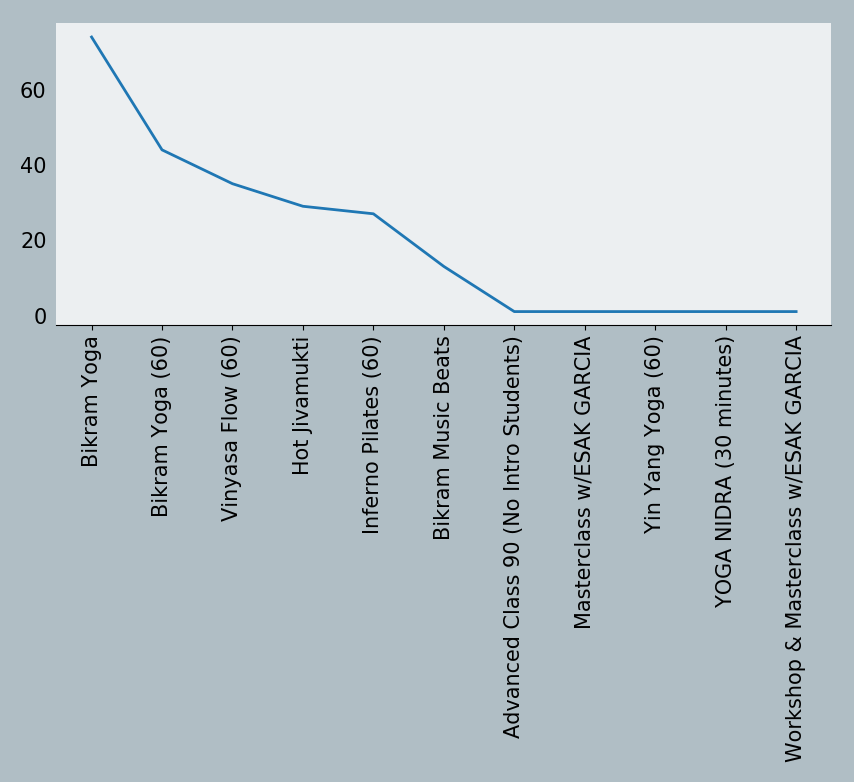

In [363]:
plt.figure(figsize=(10,4))
plt.plot(df_all['Class Type'].value_counts().index, df_all['Class Type'].value_counts())
plt.xticks(rotation=90)

In [364]:
clen_class_names = {'Bikram Yoga (90 min class)': 'Bikram Yoga',  'Hot Jivamukti (90 mins)': 'Hot Jivamukti',
                    'BYL Express (60)': 'Bikram Yoga (60)', 'Bikram Yoga SHORT (60 mins)': 'Bikram Yoga (60)',
                    'BYL Hot Power Flow': 'Vinyasa Flow (60)', 'Hot Vinyasa Flow (60)': 'Vinyasa Flow (60)',
                    'Yin Yang Yoga': 'Yin Yang Yoga (60)', 'Hot Power Flow (60 mins)':'Vinyasa Flow (60)'}

In [365]:
duration_dict = {'Bikram Yoga':90, 'Hot Jivamukti':90, 
                 'Bikram Yoga (60)':60, 'Vinyasa Flow (60)':60, 'Yin Yang Yoga (60)':60,
                'Advanced Class 90 (No Intro Students)': 90,
                'Masterclass w/ESAK GARCIA': 90, 'Workshop & Masterclass w/ESAK GARCIA': 160,
                'Inferno Pilates (60)':60, 'YOGA NIDRA (30 minutes)': 30,
                'Bikram Music Beats': 90, 'Yin Yang Yoga ':60}

In [366]:
df_all['Class Type'] = df_all['Class Type'].replace(clen_class_names)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

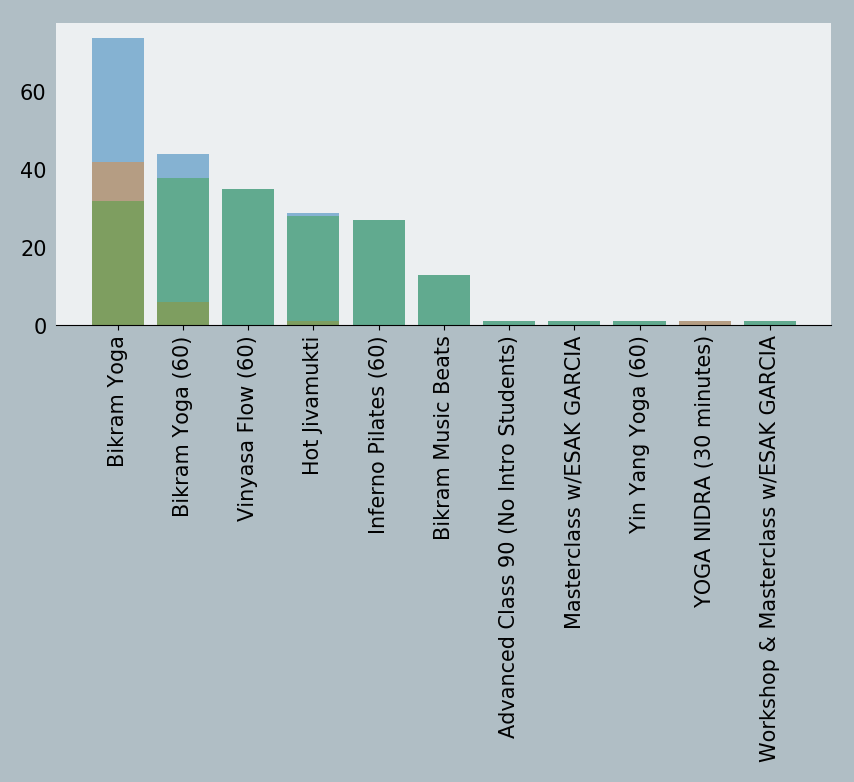

In [367]:
plt.figure(figsize=(10,4))
plt.bar(df_all['Class Type'].value_counts().index, df_all['Class Type'].value_counts(), alpha=0.5)
plt.bar(df_all.loc[df_all.index.year == 2017]['Class Type'].value_counts().index, 
       df_all.loc[df_all.index.year == 2017]['Class Type'].value_counts(), alpha=0.4)
plt.bar(df_all.loc[df_all.index.year == 2018]['Class Type'].value_counts().index, 
        df_all.loc[df_all.index.year == 2018]['Class Type'].value_counts(), alpha=0.4)
plt.xticks(rotation=90)

In [368]:
df_all['Duration'] = df_all['Class Type'].replace(duration_dict)

In [369]:
plt.rcParams.update({
    'savefig.pad_inches': 0.2,
    'figure.figsize': [8, 10],
    'figure.dpi': 100,
    'font.size': 15,
    'figure.facecolor': '#B0BEC5',  # Blue Grey 300
    'figure.titlesize': 'xx-large',
    'axes.facecolor': '#eceff1',  # Blue Grey 50
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': True,
    'lines.linewidth': 2,
    'axes.grid': False,
    'grid.color': 'white',
    'grid.linewidth': 1.5,
    'ytick.left': False,
})

In [370]:
color = plt.cm.Blues(np.linspace(1, 0.5, 2))

Text(0.5, 0, '')

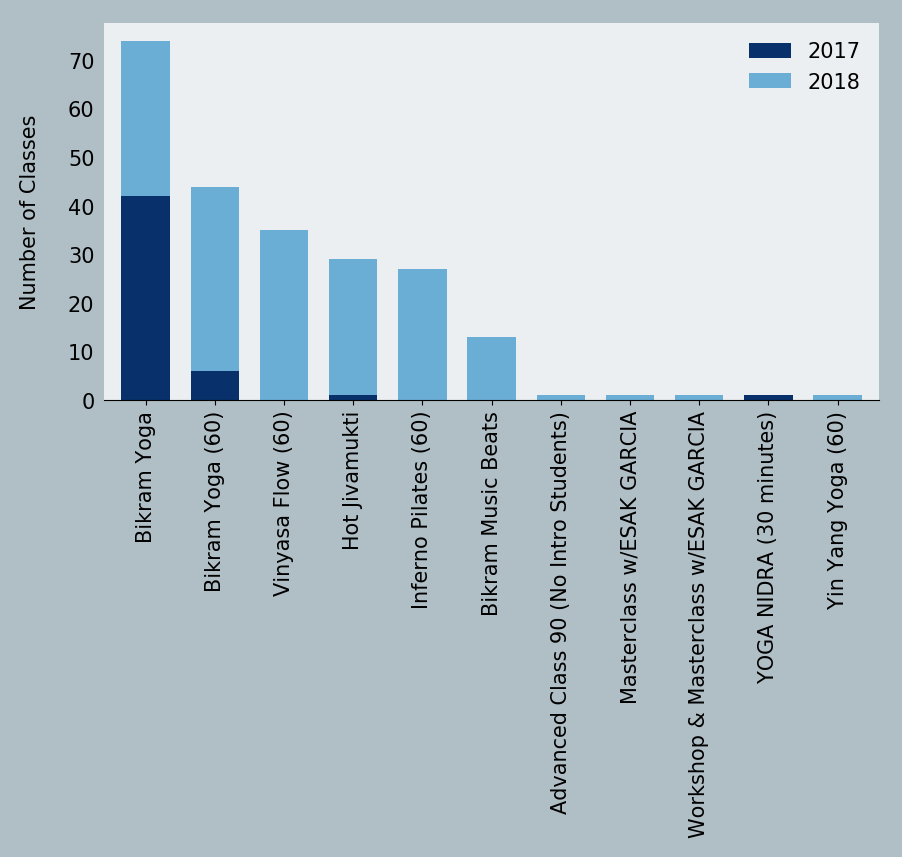

In [371]:
df = df_all.copy()
df['Year'] = df.index.year 
df = df.groupby(by=['Class Type', 'Year']).size().unstack(fill_value=0)
df['total'] = df.sum(axis=1)
df.sort_values('total', inplace=True, ascending=False)
del df['total']
df.plot.bar(stacked=True, figsize=(10, 5), color=color,  width=0.7)
plt.legend(frameon=False)
plt.ylabel('Number of Classes', labelpad=20)
plt.xlabel('')

Text(0.5, 0, '')

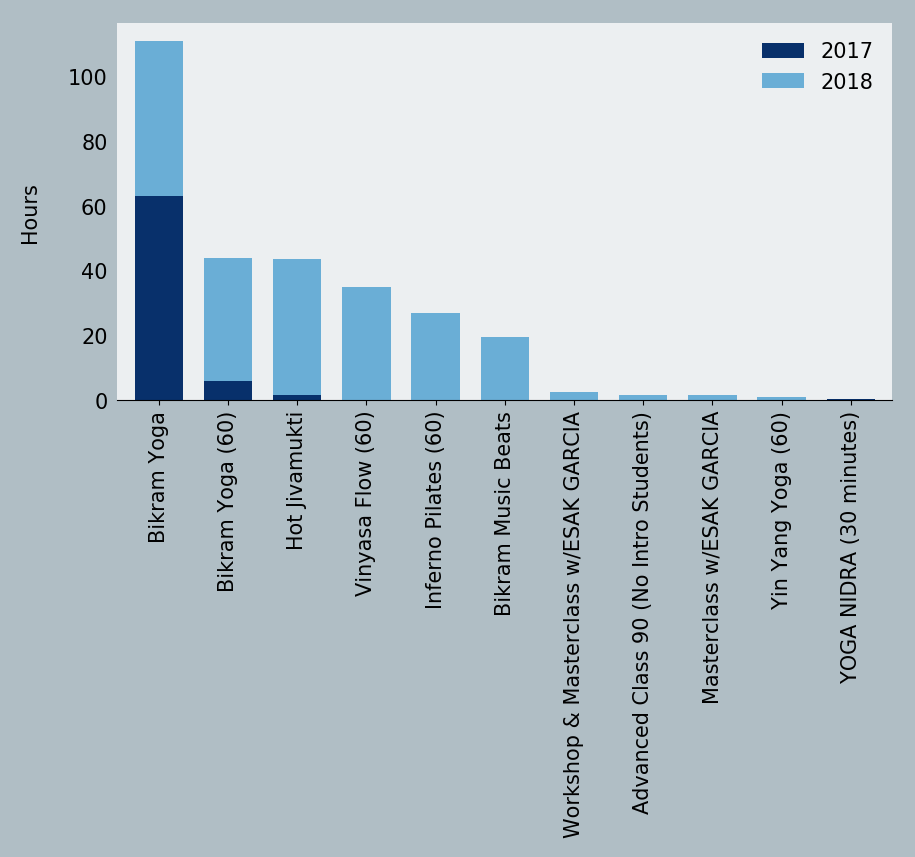

In [372]:
df = df_all.copy()
df['Year'] = df.index.year 
df = df.groupby(by=['Class Type', 'Year'])['Duration'].sum()
df = (df / 60).unstack(fill_value=0)
df['total'] = df.sum(axis=1)
df.sort_values('total', inplace=True, ascending=False)
del df['total']
df.plot.bar(stacked=True, figsize=(10, 5), width=0.7, color=color)
plt.legend(frameon=False)
plt.ylabel('Hours', labelpad=20)
plt.xlabel('')

Text(0.5, 0, 'Week days')

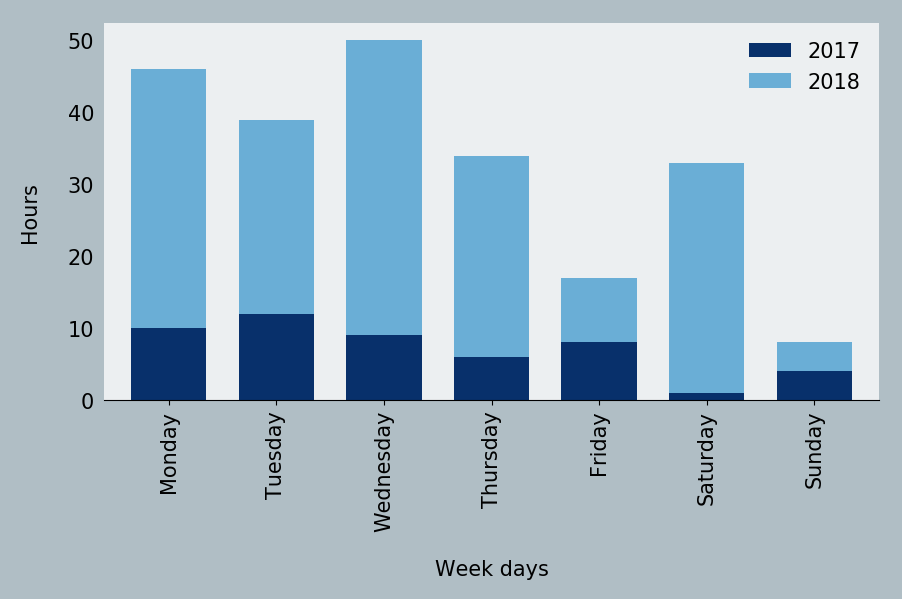

In [373]:
df = df_all.copy()
df['Year'] = df.index.year 
df = df.groupby(by=['Day', 'Year']).size().unstack(fill_value=0)
df = df.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df.plot.bar(stacked=True, figsize=(10, 5), width=0.7, color=color)
plt.legend(frameon=False)
plt.ylabel('Hours', labelpad=20)
plt.xlabel('Week days', labelpad=20)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

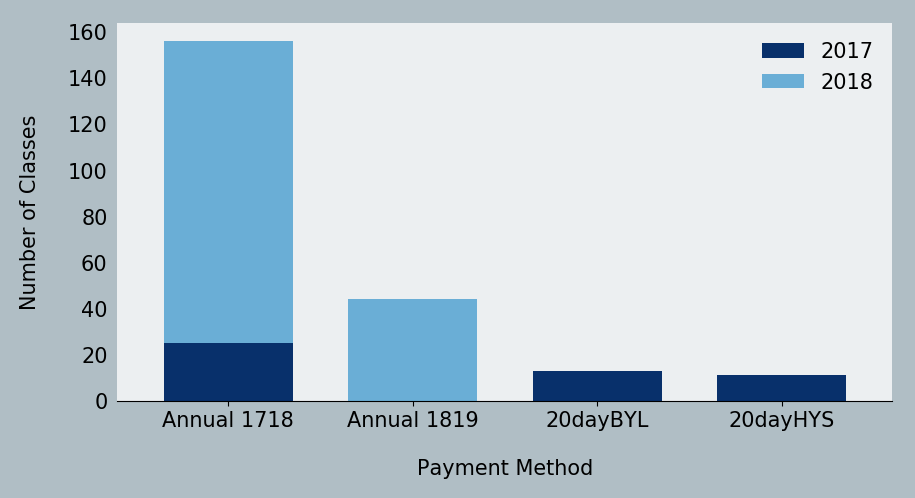

In [374]:
df = df_all.copy()
df['Year'] = df.index.year 
df = df.groupby(by=['Payment Method', 'Year']).size().unstack(fill_value=0)
df['total'] = df.sum(axis=1)
df.sort_values('total', inplace=True, ascending=False)
del df['total']
df.plot.bar(stacked=True, figsize=(10, 5), width=0.7, color=color)
plt.legend(frameon=False)
plt.ylabel('Number of Classes', labelpad=20)
plt.xlabel('Payment Method', labelpad=20)
plt.xticks(rotation=0)

In [375]:
df = df_all.copy()
df['Year'] = df.index.year 
df = df[~df['Class Type'].isin(['Workshop & Masterclass w/ESAK GARCIA', 'Masterclass w/ESAK GARCIA'])]
df = df.groupby(by=['Payment Method', 'Year']).size().unstack(fill_value=0)
df['total'] = df.sum(axis=1)
df.sort_values('total', inplace=True, ascending=False)
df['Price'] = [900, 1000, 40, 40]
df['Class unit'] = df['Price'] / df['total']
df

Year,2017,2018,total,Price,Class unit
Payment Method,,,,,
Annual 1718,25,131,156,900,5.769231
Annual 1819,0,44,44,1000,22.727273
20dayBYL,13,0,13,40,3.076923
20dayHYS,11,0,11,40,3.636364


(array([0, 1]), <a list of 2 Text xticklabel objects>)

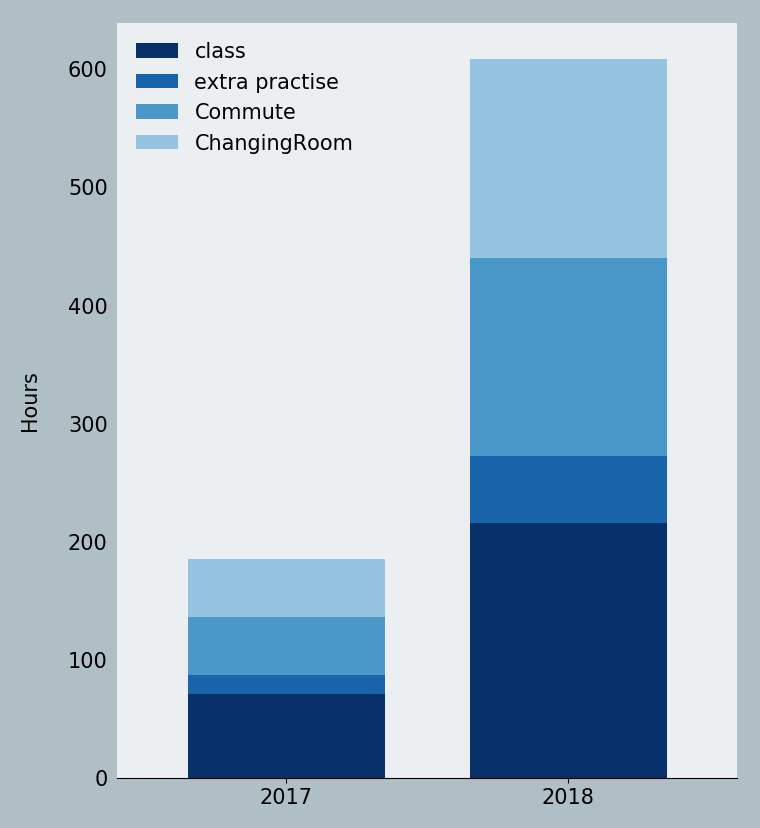

In [376]:
color = plt.cm.Blues(np.linspace(1, 0.4, 4))
df = df_all.copy()
df['Year'] = df.index.year 
df = df.resample('D')['Duration'].sum()
df = df[df != 0]
df = df.to_frame(name='class')
df['extra practise'] = 20
df['Commute'] = 60
df['ChangingRoom'] = 60
df = df.resample('Y').sum()
df = df / 60
df.index = ['2017', '2018']
df.plot.bar(stacked=True, width=0.7, color=color)
plt.legend(frameon=False)
plt.ylabel('Hours', labelpad=20)
#plt.ylabel('Week days', labelpad=20)
plt.xticks(rotation=0)

Text(0.5, 0, 'Teachers')

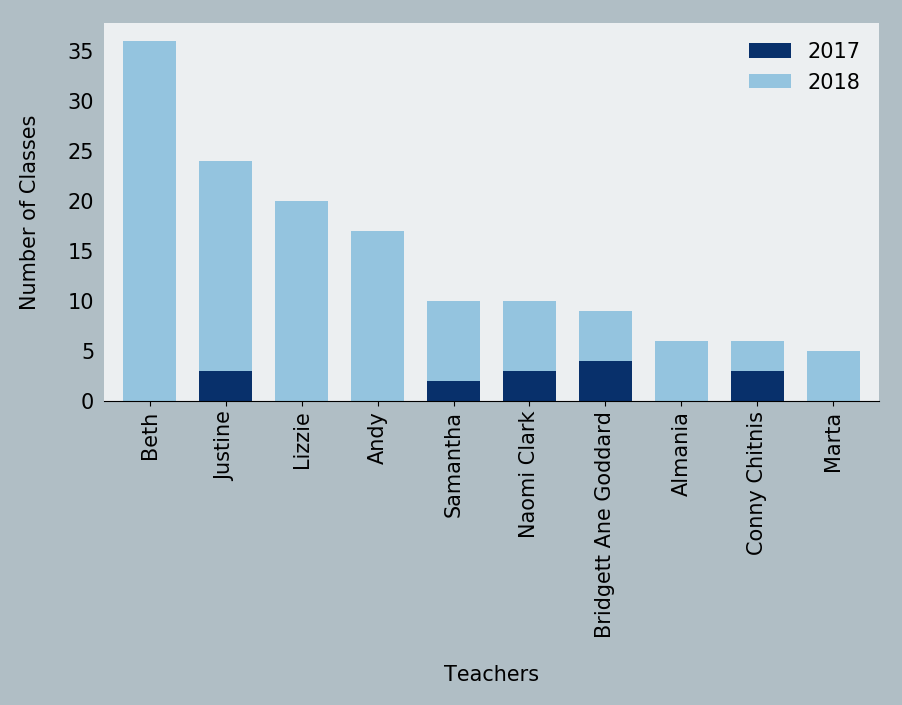

In [377]:
color = plt.cm.Blues(np.linspace(1, 0.4, 2))
df = df_all.copy()
df['Year'] = df.index.year 
df = df.groupby(['Teacher', 'Year']).size().unstack(fill_value=0)
df['total'] = df.sum(axis=1)
df.sort_values('total', inplace=True, ascending=False)
del df['total']
df.iloc[:10].plot.bar(stacked=True, figsize=(10, 5), width=0.7, color=color)
plt.legend(frameon=False)
plt.ylabel('Number of Classes', labelpad=20)
plt.xlabel('Teachers', labelpad=20)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

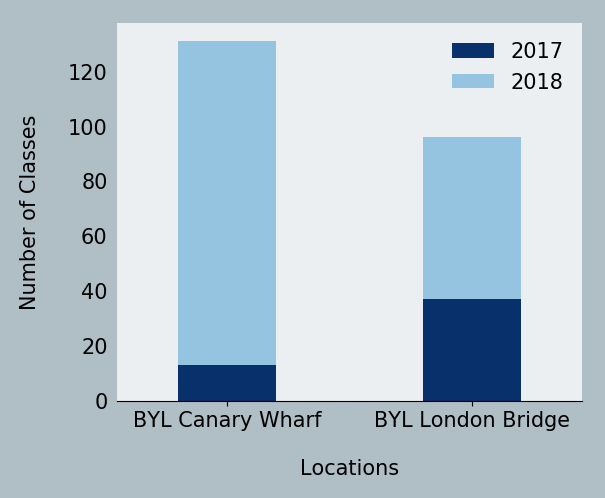

In [378]:
df = df_all.copy()
df['Year'] = df.index.year 
location_map = {'Free Birthday Class': 'BYL London Bridge', 'Intro to London Bridge 20 day pass!': 'BYL London Bridge',
               'London Bridge 365 Consecutive Day Pass': 'BYL London Bridge'}
df['Location'] = df['Location'].replace(location_map)
df = df.groupby(['Location', 'Year']).size().unstack(fill_value=0)
df.plot.bar(stacked=True, figsize=(6, 5), width=0.4, color=color)
plt.legend(frameon=False)
plt.ylabel('Number of Classes', labelpad=20)
plt.xlabel('Locations', labelpad=20)
plt.xticks(rotation=0)

In [381]:
df_all['Duration'].sum()/60

287.1666666666667

In [350]:
df_indaba = pd.read_csv('Indaba.csv')

In [353]:
6*90 /60

9.0

Extra classes in Liverpool 2 hours £9, £10. Indaba £30, Workshop £45

In [382]:
30 + 9 + 10 + 45 

94